In [73]:
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import pickle
from constants import *
import rioxarray as rxr
from locale import atof, setlocale, LC_NUMERIC
plt.style.use(home_dir+'stylefile.mplstyle')
setlocale(LC_NUMERIC,'')
atof('123,123')


123123.0

In [78]:
with open(pe_data_dir + 'streamflow_metadata.pickle', 'rb') as handle:
    md = pickle.load(handle)

with open(pe_data_dir + 'gaged_basins.pickle', 'rb') as handle:
    gaged_basins= pickle.load(handle)


gages_metadata = gpd.read_file(home_dir+ 'gages_metadata.gdf')
fires_allyears = gpd.read_file(home_dir + 'fires_allyears.gdf')
snowzone = gpd.read_file(data_dir + 'snowzone/snowzone.shp')
 ## should do this as a tif? don't mask in GEE, just make the values and deal with the mask in python
snowzone_rp = snowzone.to_crs(fires_allyears.crs)
nadcrs = fires_allyears.crs
gaged_basins = gaged_basins.set_crs(fires_allyears.crs)


In [16]:
fires_allyears.crs

<Projected CRS: PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["Nor ...>
Name: NAD_1983_Albers
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

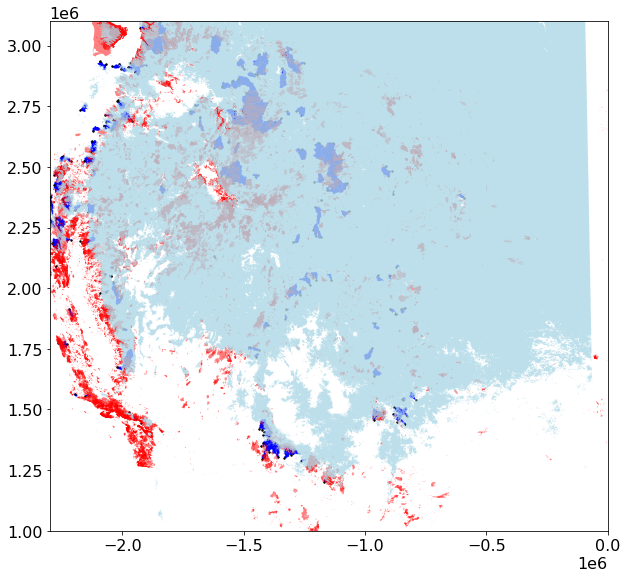

In [17]:
## plot showing gaged basins that fit the williams parameters, location of the gages, and fire boundaries
fig,ax=plt.subplots(figsize=(10,10))
gaged_basins.geometry.plot(ax=ax,color='blue') ##outlines of gaged basins
gages_metadata.plot(ax=ax,color='k',markersize=2)
fires_allyears.plot(ax=ax,color='red',alpha=0.5) ## fires
snowzone_rp.plot(ax=ax, color='lightblue',alpha=0.8) ## snowzone
ax.set_xlim(-2.3e6,0)
ax.set_ylim(1e6,3.1e6)
plt.show()

In [138]:
gaged_basins = gaged_basins.set_crs(fires_allyears.crs)


In [139]:
## get fires from all years that are in the gaged watersheds
gaged_fires = gpd.sjoin(fires_allyears,gaged_basins)

<AxesSubplot:>

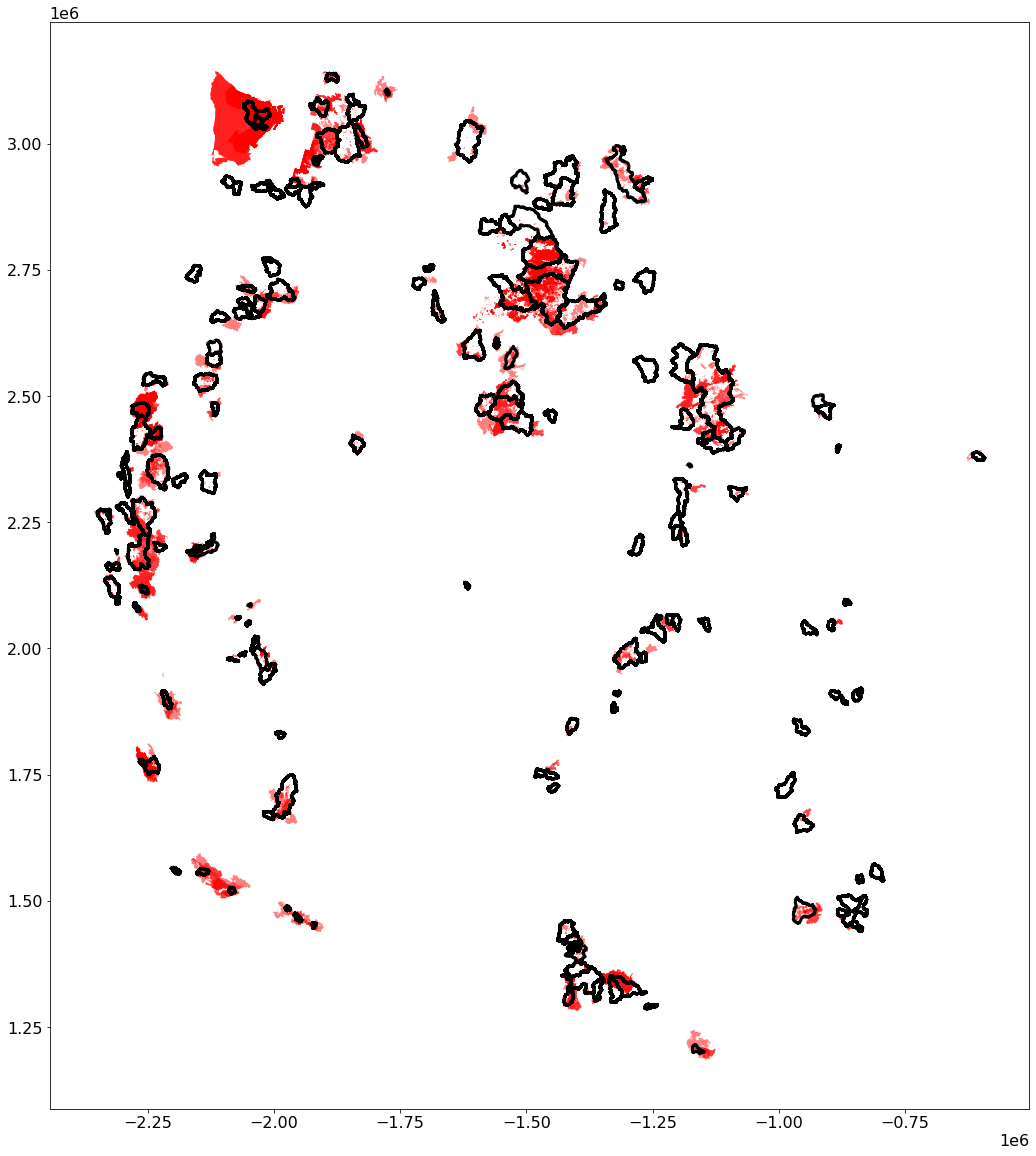

In [140]:
fig,ax=plt.subplots(figsize=(20,20))
gaged_fires.plot(ax=ax,color='red',alpha=0.5)
gaged_basins.boundary.plot(ax=ax,color='black')
plt.show()

1927    702634500.0
dtype: float64 35986     2.026772e+09
35995     3.958309e+08
39205     1.131212e+06
39291     7.739091e+08
39390     1.353648e+06
39417     2.051776e+04
39420     1.132361e+07
39422     1.837873e+06
39423     1.047019e+06
39424     1.542297e+04
39497     9.438774e+04
39502     1.646116e+05
39550     3.415585e+05
39551     8.307046e+04
39585     4.965674e+07
39595     1.295895e+06
39646     1.459040e+06
39647     1.844225e+05
39723     2.031242e+06
39724     9.466770e+04
39725     1.941507e+06
68936     2.027809e+09
76589     7.093648e+08
96304     9.425863e+04
96308     3.958308e+08
96317     1.049444e+06
96374     1.849051e+05
96375     1.589650e+04
96417     1.459132e+06
96418     1.640074e+05
96419     1.353429e+06
96420     1.132175e+07
96421     2.032309e+06
96422     9.508933e+04
96423     1.940390e+06
96438     2.060967e+04
96441     1.839045e+06
96518     8.295130e+04
96521     3.419606e+05
96770     1.631680e+06
97143     1.534050e+07
97162     2.956462e+06

<AxesSubplot:>

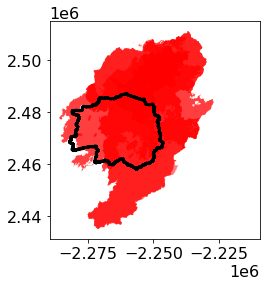

In [132]:
# gaged_basins
# fires_allyears
# snowzone_rp
test_basin = gaged_basins[gaged_basins.index==1927]
test_basin = test_basin.to_crs(fires_allyears.crs)
test_burned = gpd.sjoin(fires_allyears,test_basin,op='intersects')
print(test_basin.area,test_burned.area)
fig,ax=plt.subplots()
test_burned[test_burned.index==test_burned.index[1]].plot(ax=ax,color='r',alpha=0.5)
test_burned.plot(ax=ax,color='r',alpha = 0.5)
test_basin.boundary.plot(ax=ax,color='black')


In [46]:
fire1 = test_burned[test_burned.index==test_burned.index[1]]

In [127]:
test_basin = gaged_basins[gaged_basins.index==1927]

<AxesSubplot:>

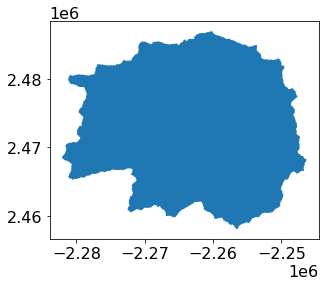

In [128]:
test_basin.plot()

C:\Users\Marianne\AppData\Local\Temp/ipykernel_13828/436379393.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["Nor ...

  test = gpd.sjoin(test_basin,snowzone_rp)


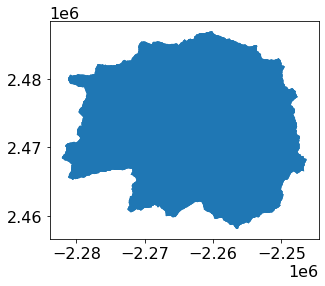

In [129]:
test = gpd.sjoin(test_basin,snowzone_rp)

fig,ax = plt.subplots()
test.plot(ax=ax)
plt.show()

In [54]:
## to do
## calculate how much of each basin is burned
## get mtbs burn severity layer and load
## clip to relevant years
## calculate how much of each basin is in the SSZ?
## how much of the burn area was SSZ?
## how to clip vectors to vectors?
## convert snowzone to a raster?
## need to download an elevation raster!! maybe SRTM?
## add contextily

,AREA,PERIMETER,GAGE_ID,geometry
1,79728300.0,55920.0,05014500,"POLYGON ((-1312215.000 2990115.000, -1312215.0..."


In [97]:
# test_snow = snowzone_rp.clip(test_basin.geometry)
test_snow =gpd.sjoin(snowzone_rp,test_basin)
fig,ax=plt.subplots()
test_snow.plot(ax=ax)
test_basin.boundary.plot(ax=ax)
#snowzone_rp.plot(ax=ax)

TypeError: '>=' not supported between instances of 'float' and 'Polygon'

In [59]:
ssz_raster = snowzone_rp.to_xarray()

In [81]:
fn = 'c:/users/marianne/documents/data/GOSIF/data.globalecology.unh.edu/data/GOSIF-GPP_v2/Monthly/Mean/GOSIF_GPP_2005.M08_Mean.tif'
tmp = rxr.open_rasterio(fn)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]] EPSG:4326


In [100]:
snowzone_4326 = snowzone.to_crs('epsg:4326')
gpp_snowzone = tmp.rio.clip(snowzone_4326.geometry)
test_gpp = tmp.rio.clip(test_basin.to_crs(tmp.rio.crs).geometry)


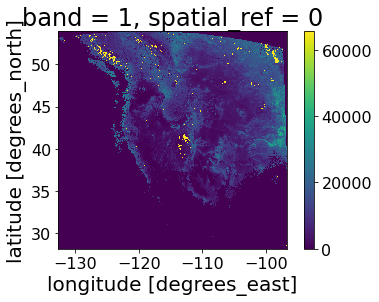

In [96]:
fig,ax = plt.subplots()
snowzone_4326.plot(ax=ax)
gpp_snowzone.plot(ax=ax)
plt.show()

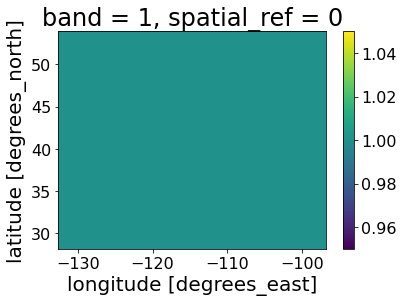

In [115]:
gpp_snowzone.notnull().plot()

<AxesSubplot:title={'center':'band = 1, spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

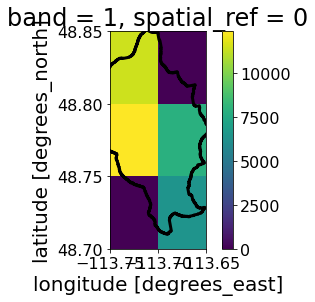

In [111]:
fig,ax=plt.subplots()
test_gpp.plot(ax=ax)
test_basin.to_crs(test_gpp.rio.crs).boundary.plot(ax=ax,color='k')

In [ ]:
## merge multiple fires? or just look at one year. what are the year bounds on the streamflow data
## how to get climate-based predictions
## runoff ratios from prism
## put this all on savio
## then autodownload and clip the prism bil files